### CHIP PRICE FORECASTING

In [136]:
### importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import warnings
warnings.filterwarnings('ignore')

In [137]:
## reading the dataset.
data = pd.read_csv("C:/Users/nikhi/Desktop/Machine Learning/project/data_stock market_machine learning.csv")
data.head()

,Date,INTC,SMTC,AWSL,MU,AMAT,ASML,NVDA,TXN,QCOM,AMD
0,03-01-2000,0.102395,-0.209243,0.796859,0.327092,-0.276749,-0.514996,-0.474523,-0.414071,-0.305455,-0.066229
1,04-01-2000,0.109112,-0.208341,0.809678,0.336041,-0.278023,-0.515054,-0.474962,-0.415233,-0.311240,-0.064951
2,05-01-2000,0.116882,-0.205126,0.823123,0.345006,-0.278544,-0.514974,-0.475389,-0.415765,-0.315291,-0.063553
3,06-01-2000,0.123617,-0.201557,0.837143,0.352343,-0.278581,-0.514838,-0.475816,-0.415807,-0.318749,-0.062580
4,07-01-2000,0.129568,-0.196883,0.851673,0.358047,-0.278281,-0.514615,-0.476216,-0.415116,-0.320731,-0.061962


In [138]:
### getting the information about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5744 non-null   object 
 1   INTC    5744 non-null   float64
 2   SMTC    5744 non-null   float64
 3   AWSL    5744 non-null   float64
 4   MU      5744 non-null   float64
 5   AMAT    5744 non-null   float64
 6   ASML    5744 non-null   float64
 7   NVDA    5744 non-null   float64
 8   TXN     5744 non-null   float64
 9   QCOM    5744 non-null   float64
 10  AMD     5744 non-null   float64
dtypes: float64(10), object(1)
memory usage: 493.8+ KB


In [139]:
print("Number of columns in the dataset : ", data.shape[1])
print("Number of Rows in the dataset : ", data.shape[0])

Number of columns in the dataset :  11
Number of Rows in the dataset :  5744


### Data Preprocessing

In [140]:
### getting descriptive statistics ## chip was already been normalized.
data.describe()

,INTC,SMTC,AWSL,MU,AMAT,ASML,NVDA,TXN,QCOM,AMD
count,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000
mean,0.002103,0.015460,-0.018226,0.001550,0.008559,0.011685,0.015829,0.000371,0.003352,0.011553
std,0.973834,0.974018,0.791528,0.957249,1.000049,1.007817,1.009423,0.997807,0.992449,0.999964
min,-1.050615,-1.082232,-0.536741,-1.022933,-0.642199,-0.610469,-0.489854,-0.795750,-1.074262,-0.703028
25%,-0.752981,-0.726557,-0.492951,-0.704108,-0.534428,-0.563416,-0.461261,-0.645368,-0.594754,-0.567021
50%,-0.482860,-0.281355,-0.345159,-0.470000,-0.441023,-0.493434,-0.441613,-0.554638,-0.253522,-0.335958
75%,0.543574,0.320799,0.148856,0.678805,0.152517,0.023237,-0.032099,0.325702,0.181607,0.070785
max,2.294268,2.920971,3.705596,2.567992,3.497803,3.447471,3.954072,2.732763,3.319829,3.727526


**Checking the Missing values in the dataset**

In [141]:
### checking the missing values in the dataset.
data.isna().sum()

Date    0
INTC    0
SMTC    0
AWSL    0
MU      0
AMAT    0
ASML    0
NVDA    0
TXN     0
QCOM    0
AMD     0
dtype: int64

- There are no missing values in the dataset.

In [142]:
## Converting the string format of Date in to date and Time formate

data["Date"] = pd.to_datetime(data.Date, format="%d-%m-%Y")

### Ensuring the data was in Cronicol order.
data.sort_values(by="Date", inplace=True)

**creating month , year and day coloumns**

In [143]:
data["year"] = data['Date'].dt.year
data["month"] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [144]:
data.head()

,Date,INTC,SMTC,AWSL,MU,AMAT,ASML,NVDA,TXN,QCOM,AMD,year,month,day
0,2000-01-03,0.102395,-0.209243,0.796859,0.327092,-0.276749,-0.514996,-0.474523,-0.414071,-0.305455,-0.066229,2000,1,3
1,2000-01-04,0.109112,-0.208341,0.809678,0.336041,-0.278023,-0.515054,-0.474962,-0.415233,-0.311240,-0.064951,2000,1,4
2,2000-01-05,0.116882,-0.205126,0.823123,0.345006,-0.278544,-0.514974,-0.475389,-0.415765,-0.315291,-0.063553,2000,1,5
3,2000-01-06,0.123617,-0.201557,0.837143,0.352343,-0.278581,-0.514838,-0.475816,-0.415807,-0.318749,-0.062580,2000,1,6
4,2000-01-07,0.129568,-0.196883,0.851673,0.358047,-0.278281,-0.514615,-0.476216,-0.415116,-0.320731,-0.061962,2000,1,7


### Exploratory Data Analysis

In [145]:
### defining the columns 
cols = ["INTC", "SMTC",	"AWSL",	"MU",	"AMAT",	"ASML",	"NVDA",	"TXN",	"QCOM",	"AMD"]

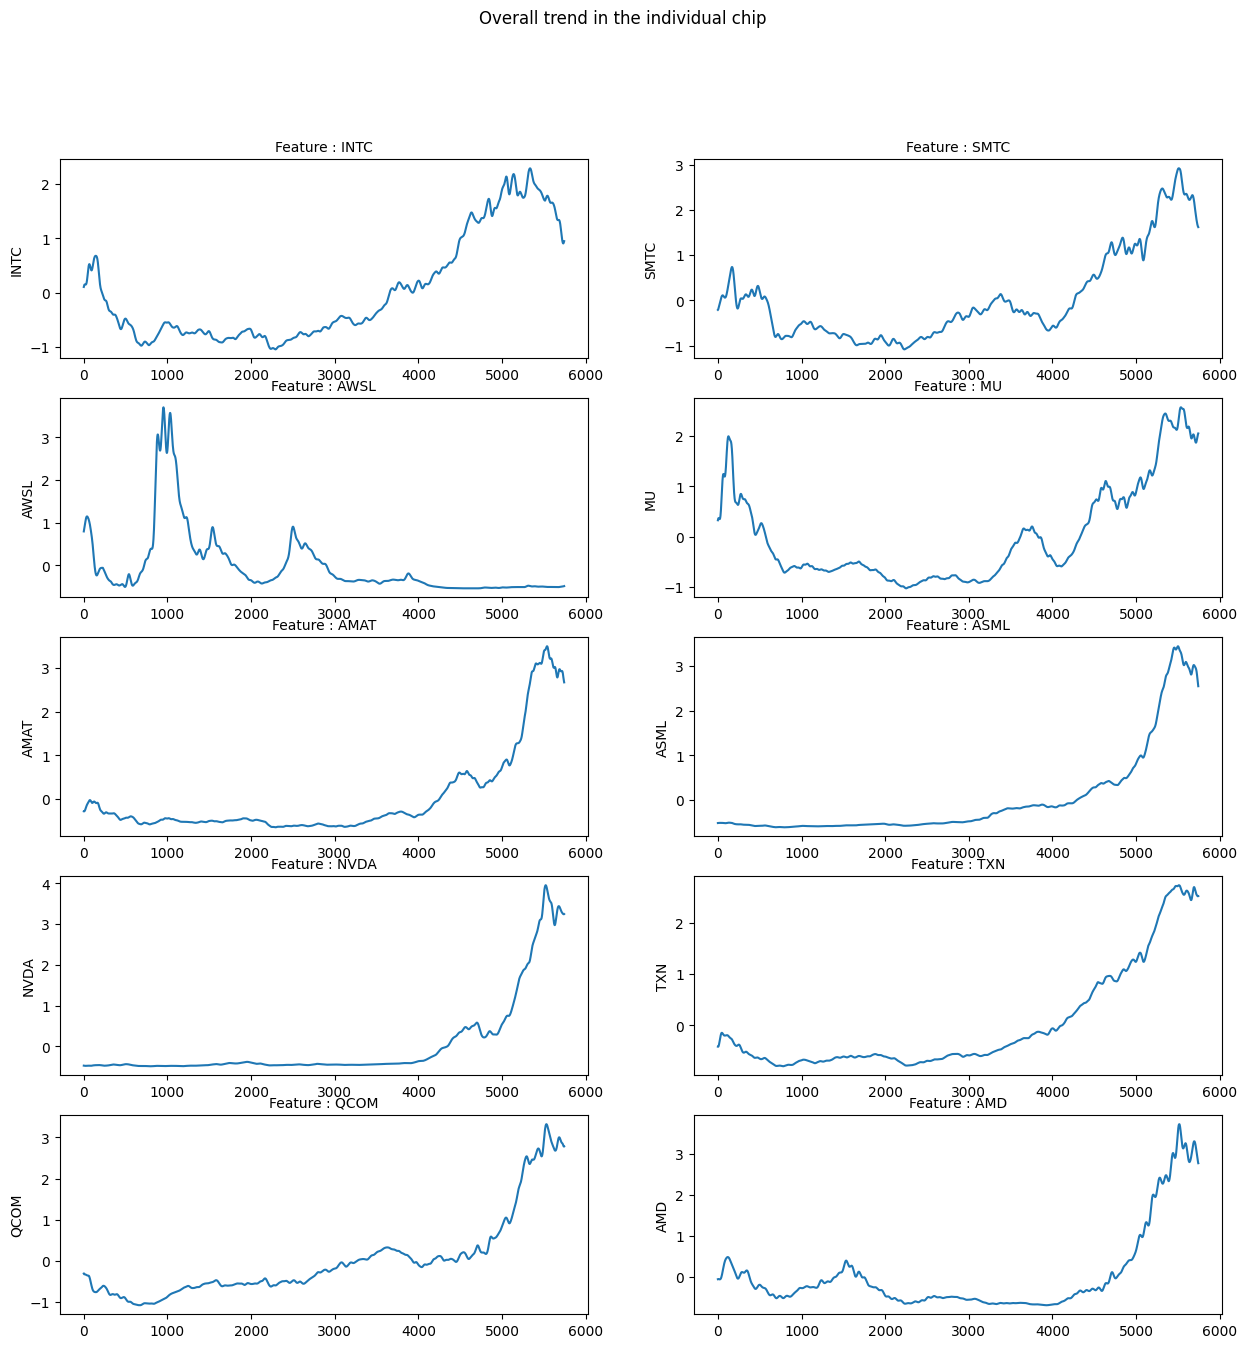

In [146]:
def visualization(data, title):
    columns = cols
    plt.figure(figsize=(15,15))
    for k,i in enumerate(columns):
        plt.subplot(5,2,k+1)
        sbn.lineplot(data[i])
        plt.title(f"Feature : {i}",size = 10)
        plt.ylabel(i)
        
    plt.suptitle(title, size = 12)
    plt.show()
    
visualization(data, "Overall trend in the individual chip")

In [147]:
## year value based trend
temp_df = data.groupby('year')[cols].agg('mean')

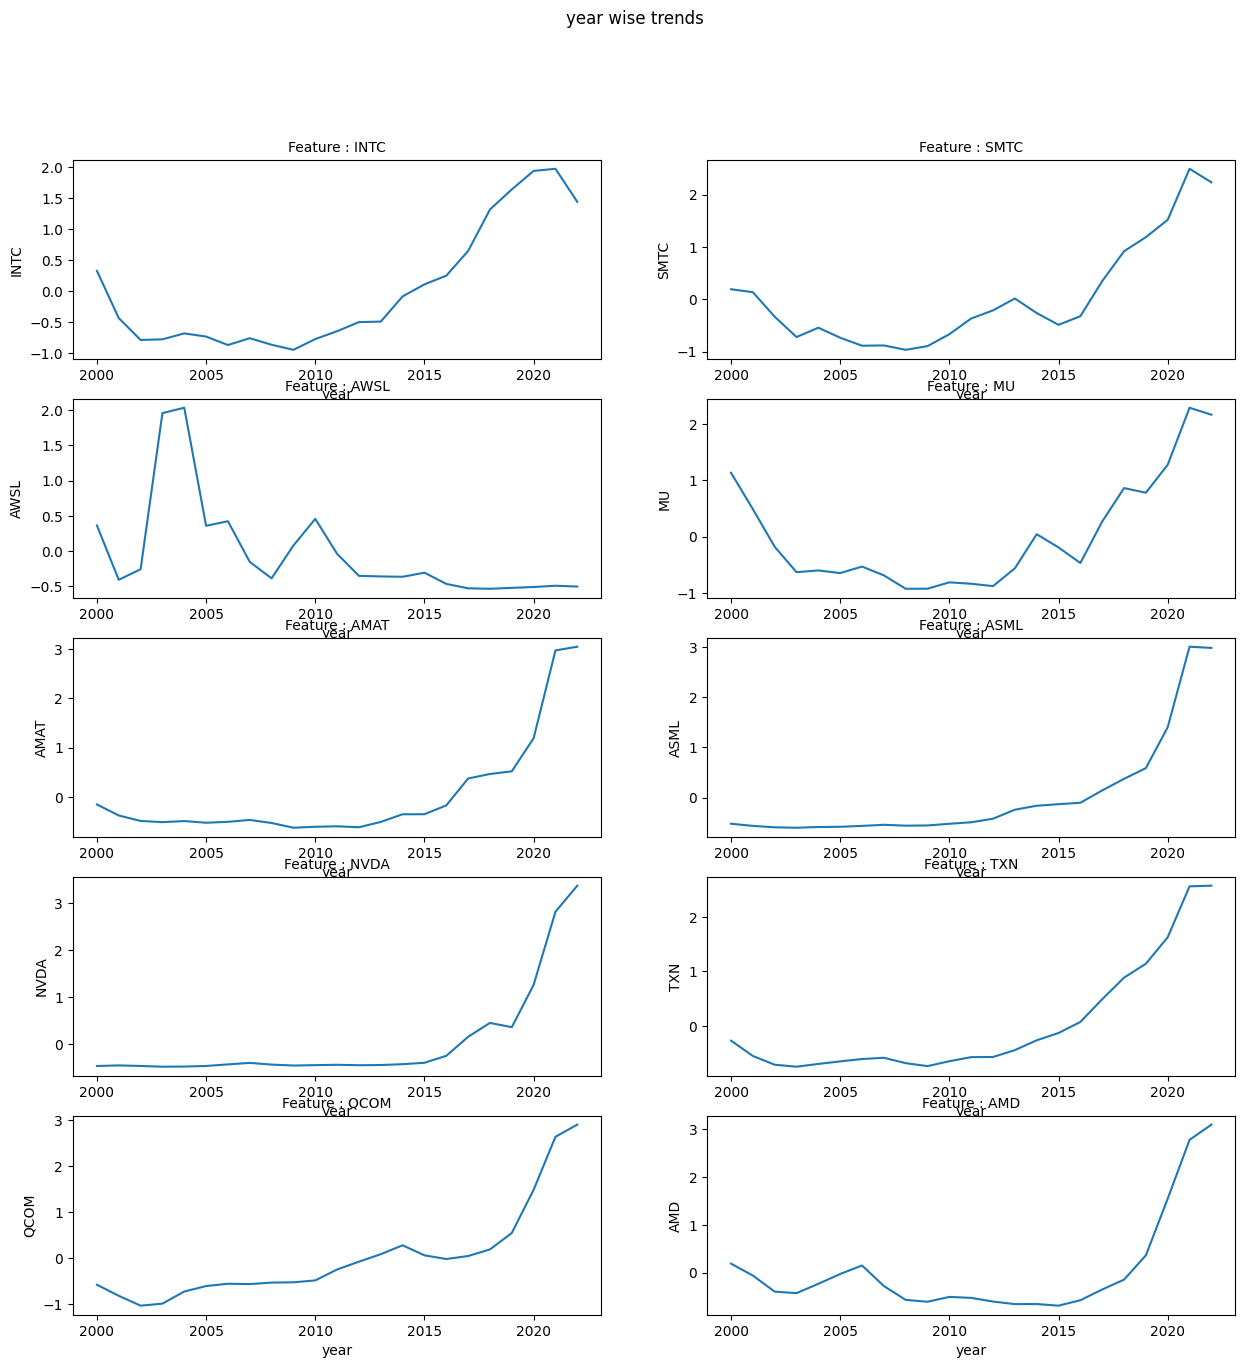

In [148]:
visualization(temp_df, "year wise trends")

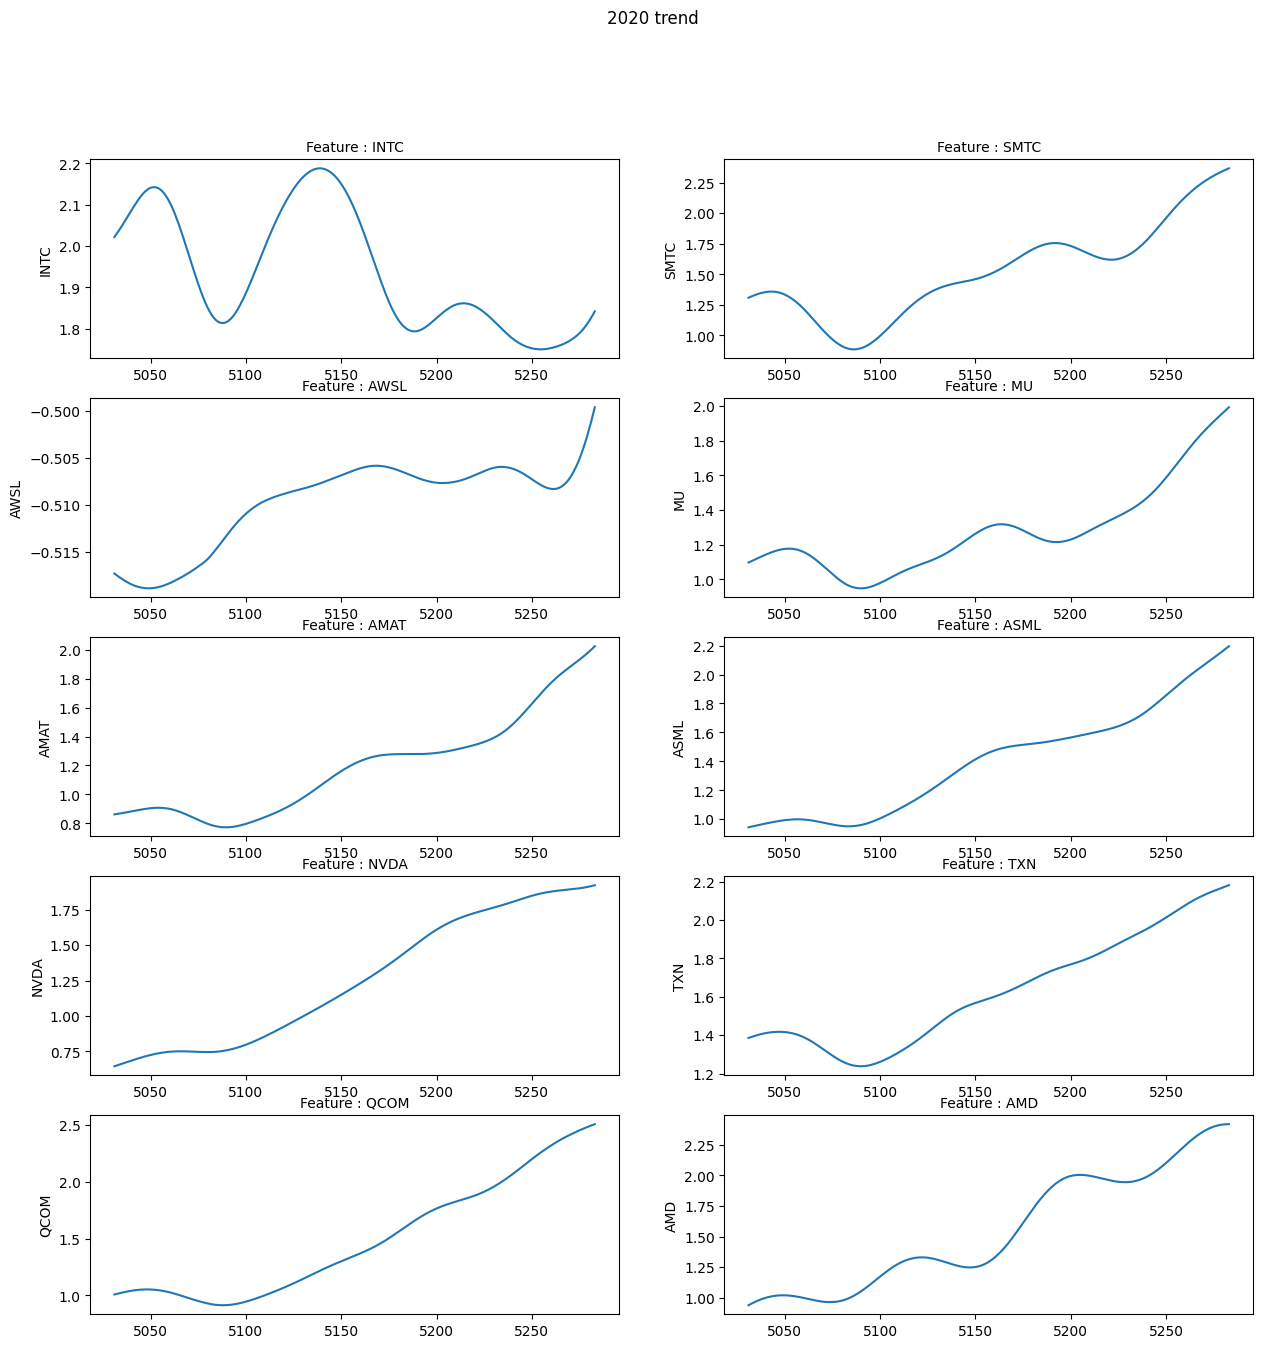

In [149]:
### Trend in a particular year
year = 2020
temp_df = data.loc[data['year']==year]
visualization(temp_df, f"{year} trend")

- visually Seems to be there is no stationary in it.
- and Some features following the increasing Trend

#### Checking the stationary using the Rolling Window Method

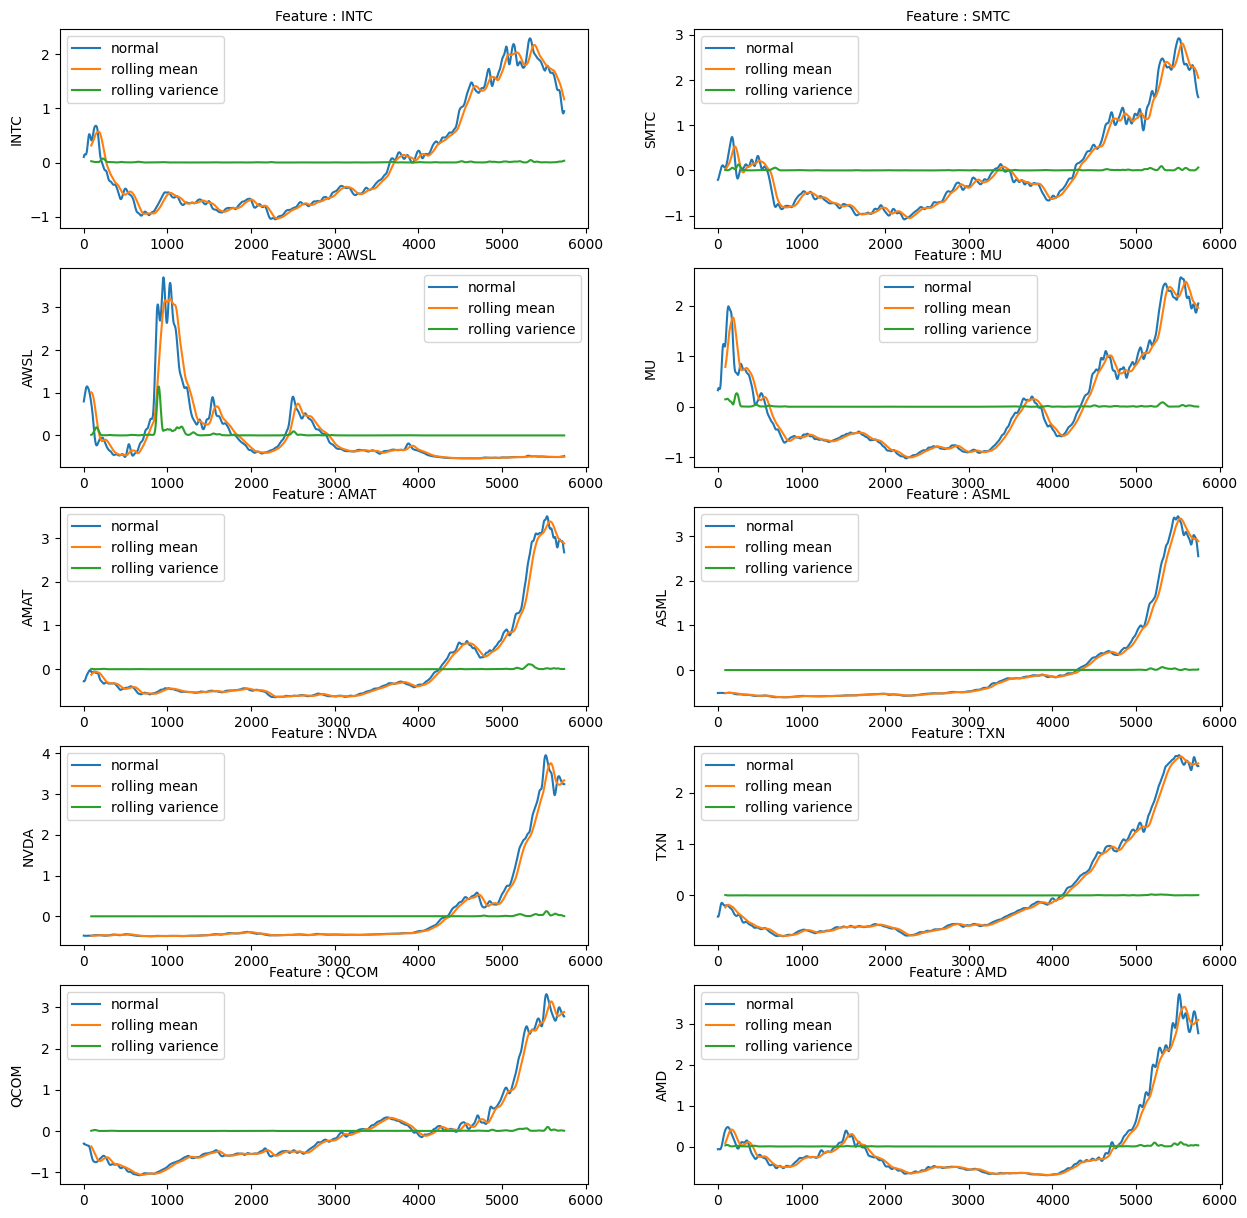

In [150]:
rolling_window_size = 90

plt.figure(figsize=(15,15))
for k,i in enumerate(cols):
    plt.subplot(5,2,k+1)
    plt.plot(data[i])
    plt.plot(data[i].rolling(rolling_window_size).mean())
    plt.plot(data[i].rolling(rolling_window_size).var())
    plt.legend(["normal","rolling mean", "rolling varience"])
    plt.title(f"Feature : {i}",size = 10)
    plt.ylabel(i)
plt.show()

- At particular time period  varience seems to be maintaining the constant , but we can see the trend in mean.

#### Stationarity of a Time series can be checking with the Augmented Dickey-Fuller (ADF) test.

In [151]:
from statsmodels.tsa.stattools import adfuller

In [152]:
print("The Significance level : ",0.005)
for i in cols:
    res = adfuller(data[i])
    print(f"{i} , p-value : {res[1]}")

The Significance level :  0.005
INTC , p-value : 0.9654029404903902
SMTC , p-value : 0.8697108992337079
AWSL , p-value : 0.005332582499766836
MU , p-value : 0.9742799058551617
AMAT , p-value : 0.9879232899044988
ASML , p-value : 0.9973361150593513
NVDA , p-value : 1.0
TXN , p-value : 1.0
QCOM , p-value : 1.0
AMD , p-value : 0.998989467986211


- All the p-value are not less than the significance values so we will accept the null hypothies.
- That is all the features are non-stationary.

#### Splitting Data in to testing and Training Dataset

In [153]:
### splitting the dataset using the data 
## BY Year
split_interval_year = 2020

temp_data = data.copy()
train_data = temp_data.loc[temp_data["year"]<split_interval_year][cols]
test_data = temp_data.loc[temp_data["year"]>=split_interval_year][cols]


In [154]:
### resetting the index of the dataset.
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [155]:
### sizes of the dataset
print("The size of the training dataset : ", train_data.shape)
print("The size of the test dataset : ", test_data.shape)

The size of the training dataset :  (5031, 10)
The size of the test dataset :  (713, 10)


#### Building the Model
**Model 1: VAR**

In [156]:
from statsmodels.tsa.api import VAR

In [157]:
### defining the models 
model_var = VAR(train_data)

## need to select the order. This can get by the 
model_var.select_order().summary()

,AIC,BIC,FPE,HQIC
0,-33.32,-33.31,3.366e-15,-33.32
1,-127.6,-127.5,3.741e-56,-127.6
2,-184.3,-184.0,9.380e-81,-184.2
3,-227.9,-227.5,1.007e-99,-227.8
4,-230.4,-229.8,9.029e-101,-230.2
5,-231.3,-230.7,3.367e-101,-231.1
6,-231.9,-231.1,1.882e-101,-231.7
7,-232.3,-231.3,1.346e-101,-231.9
8,-232.5,-231.4,1.093e-101,-232.1
9,-232.7,-231.5,8.924e-102,-232.3


In [158]:
## we need to select the order which has the minimum values here in this case is order 13.
model_var_fit = model_var.fit(33)
model_var_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, May, 2023
Time:                     22:08:12
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -230.975
Nobs:                     4998.00    HQIC:                  -233.778
Log likelihood:           520383.    FPE:               6.53675e-103
AIC:                     -235.291    Det(Omega_mle):    3.44244e-103
--------------------------------------------------------------------
Results for equation INTC
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.000003         0.000002            2.134           0.033
L1.INTC          2.954068         0.027282          108.277           0.000
L1.SMTC          0.061882         0.019419            3.187           0.001
L1.AW

In [159]:
### Forecasting the values from the 2022-05-01 to some data
preds = model_var_fit.forecast(train_data.values,len(test_data))

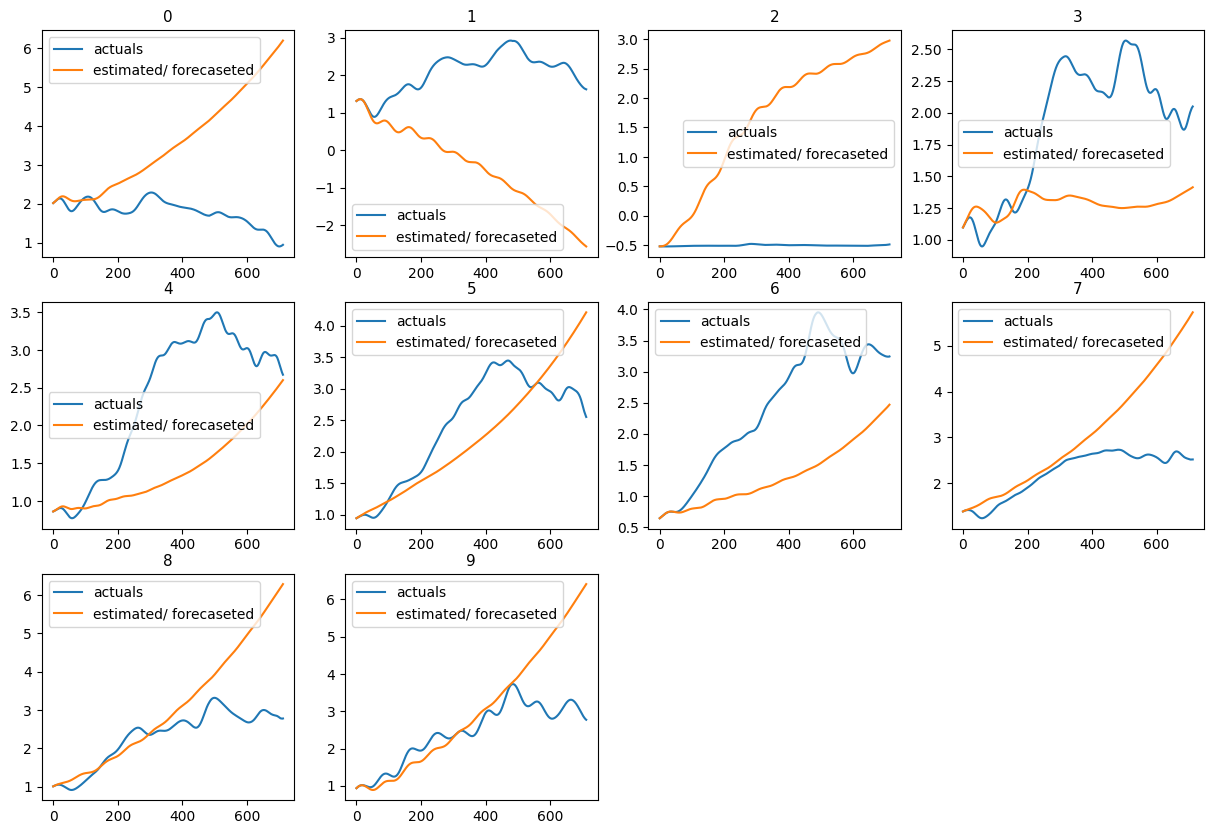

In [160]:
### Comparing the Values with the test values
plt.figure(figsize=(15,10))
for i,col in enumerate(cols):
    plt.subplot(3,4, i+1)
    plt.plot(test_data.values[:,i])
    plt.plot(preds[:,i])
    
    plt.legend(["actuals", "estimated/ forecaseted"])
    plt.title(i, size = 11)
    


In [161]:
### Metrics for this model
rmse = np.sqrt(mean_squared_error(preds, test_data.values, multioutput='raw_values'))

print("\n RMSE for each individual features ")
print(rmse)

overall_rmse = np.sqrt(mean_squared_error(preds, test_data.values))
print('\n\nOverall RMSE:', overall_rmse)


 RMSE for each individual features 
[2.31049178 2.89532581 2.39600695 0.77748746 1.16875037 0.6297905
 1.29010057 1.22669248 1.28043252 1.19527856]


Overall RMSE: 1.6753079007336344


**Model 2: ARIMA**

In [162]:
from statsmodels.tsa.arima.model import ARIMA

In [163]:
y_preds = []
for c in cols:
    d = 1
    if(c == "AWSL" or c=="SMTC"):
        d=0
    model_arima=ARIMA(train_data[c],order=(1,d,1))
    model_arima_fit=model_arima.fit()
    y_pre = model_arima_fit.predict(train_data[c].index[-1]+1, train_data[c].index[-1]+len(test_data))
    y_pre.reset_index(drop=True, inplace=True)
    y_pre = y_pre.values.tolist()
    y_preds.append(y_pre)
    # print(len(y_pre), len(test_data))
    

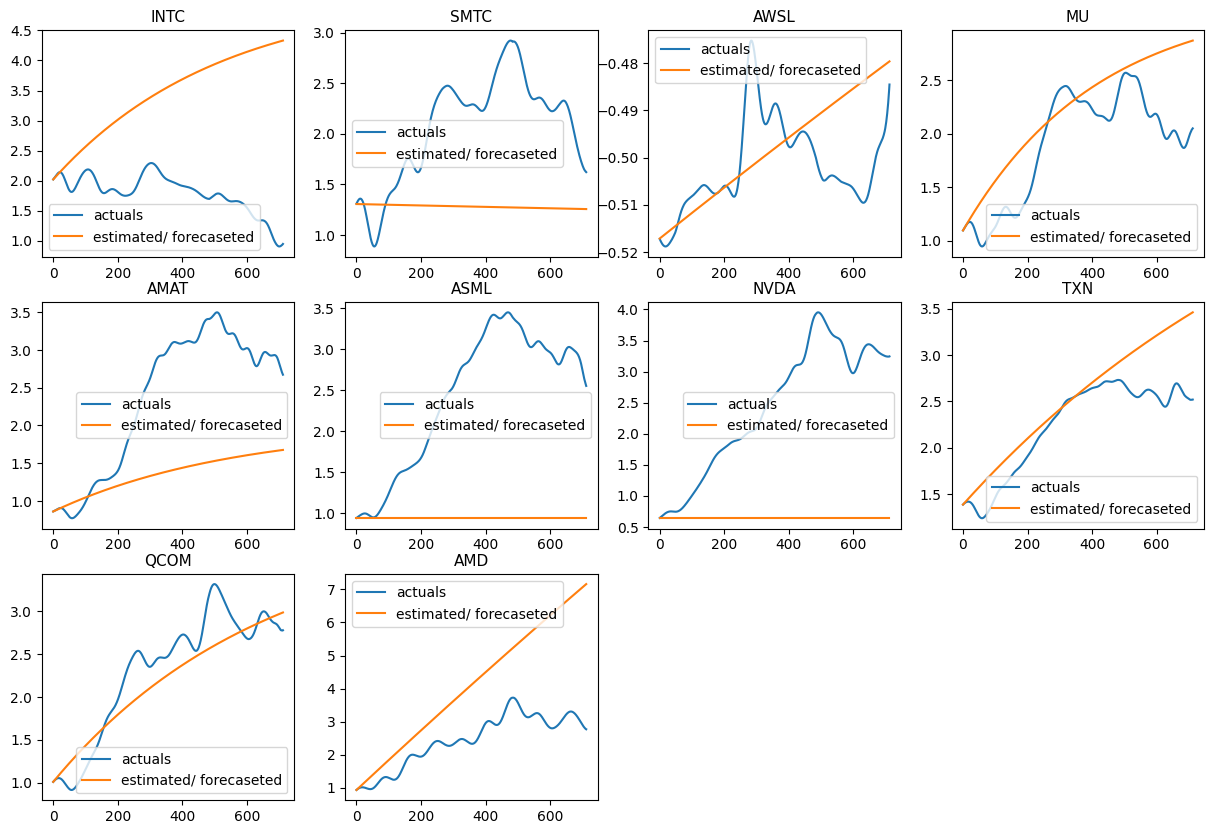

In [164]:
### plotting the graphs using ARIMA predictions
### Comparing the Values with the test values
y_preds = np.array(y_preds)
plt.figure(figsize=(15,10))
for i,col in enumerate(cols):
    plt.subplot(3,4, i+1)
    plt.plot(test_data.values[:,i])
    plt.plot(y_preds[i])
    
    plt.legend(["actuals", "estimated/ forecaseted"])
    plt.title(col, size = 11)

In [165]:
### Getting the metrics
### Metrics for this model
rmse = np.sqrt(mean_squared_error(y_preds.T, test_data.values, multioutput='raw_values'))

print("\n RMSE for each individual features ")
print(rmse)

overall_rmse = np.sqrt(mean_squared_error(y_preds.T, test_data.values))
print('\n\nOverall RMSE:', overall_rmse)


 RMSE for each individual features 
[1.86026405 0.95314429 0.01237791 0.44715517 1.23272314 1.70107503
 2.0487992  0.39513985 0.30359704 2.01035751]


Overall RMSE: 1.3217356805127627


**Model 3: RNN (Recurrent neural Network)**

##### Preparing Dataset for RNN
> Lets take the last first 10 days to predict last 5 days

In [166]:
def split_data(data, past, future):
    x = []
    y = []
    for i in range(len(data)):
        p_end = i+past
        f_end = p_end + future
        if(f_end> len(data)):
            break
        xx = data[i:p_end,:]
        yy = data[p_end:f_end]
        x.append(xx.tolist())
        y.append(yy.tolist())
        
    return np.array(x), np.array(y)

In [167]:
past = 10
future = 5
n_feat = train_data.shape[1]
train_x , train_y = split_data(train_data.values, past, future)

In [168]:
test_x, test_y = split_data(test_data.values, past, future)

#### Building the RNN model

In [169]:
### importing the tensorflow models
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.models import Model

In [170]:
### Getting a Simple RNN

inputs = Input(shape= (past, n_feat))
x = SimpleRNN(100, return_state=True)(inputs)

d_inputs = RepeatVector(future)(x[0])
d_outs = TimeDistributed(Dense(n_feat))(d_inputs)


In [171]:
Model_rnn = Model(inputs, d_outs)

In [172]:
Model_rnn.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10, 10)]          0         
                                                                 
 simple_rnn_3 (SimpleRNN)    [(None, 100),             11100     
                              (None, 100)]                       
                                                                 
 repeat_vector_3 (RepeatVect  (None, 5, 100)           0         
 or)                                                             
                                                                 
 time_distributed_3 (TimeDis  (None, 5, 10)            1010      
 tributed)                                                       
                                                                 
Total params: 12,110
Trainable params: 12,110
Non-trainable params: 0
_______________________________________________________

In [173]:
Model_rnn.compile(optimizer="adam", loss="mse")

In [174]:
Model_rnn.fit(train_x,train_y, epochs=8, validation_data=(test_x, test_y))

Epoch 1/8
157/157 [==============================] - 2s 5ms/step - loss: 0.0306 - val_loss: 1.6620
Epoch 2/8
157/157 [==============================] - 1s 4ms/step - loss: 0.0014 - val_loss: 1.4397
Epoch 3/8
157/157 [==============================] - 1s 4ms/step - loss: 7.4550e-04 - val_loss: 1.2599
Epoch 4/8
157/157 [==============================] - 1s 4ms/step - loss: 4.8156e-04 - val_loss: 1.1646
Epoch 5/8
157/157 [==============================] - 1s 4ms/step - loss: 3.7439e-04 - val_loss: 1.1068
Epoch 6/8
157/157 [==============================] - 1s 5ms/step - loss: 3.1944e-04 - val_loss: 1.0650
Epoch 7/8
157/157 [==============================] - 1s 5ms/step - loss: 2.7911e-04 - val_loss: 1.0401
Epoch 8/8
157/157 [==============================] - 1s 5ms/step - loss: 2.3674e-04 - val_loss: 1.0213


In [175]:

RNN_RSE = math.sqrt(1.3051)
print('The RMSE for RNN is',RNN_RSE )

The RMSE for RNN is 1.1424097338520887


**Model 4: DMD**

In [176]:
import numpy as np
def DMD(data, r):
    """Dynamic Mode Decomposition (DMD) algorithm."""
    X1 = data[:, : -1]
    X2 = data[:, 1 :]
    u, s, v = np.linalg.svd(X1, full_matrices = False)
    ## Compute the Koopman matrix
    A_tilde = u[:, : r].conj().T @ X2 @ v[: r, :].conj().T * np.reciprocal(s[: r])
    ## Perform eigenvalue decomposition on A_tilde
    Phi, Q = np.linalg.eig(A_tilde)
    ## Compute the coefficient matrix
    Psi = X2 @ v[: r, :].conj().T @ np.diag(np.reciprocal(s[: r])) @ Q
    A = Psi @ np.diag(Phi) @ np.linalg.pinv(Psi)
    
    return A_tilde, Phi, A

In [177]:
def DMD4cast(data, r, pred_step):
    N, T = data.shape
    _, _, A = DMD(data, r)
    mat = np.append(data, np.zeros((N, pred_step)), axis = 1)
    for s in range(pred_step):
        mat[:, T + s] = (A @ mat[:, T + s - 1]).real
    return mat[:, - pred_step :]

In [178]:
pred_step = len(test_data)
rank = 2
forescasts = DMD4cast(train_data.values.T, rank, pred_step)


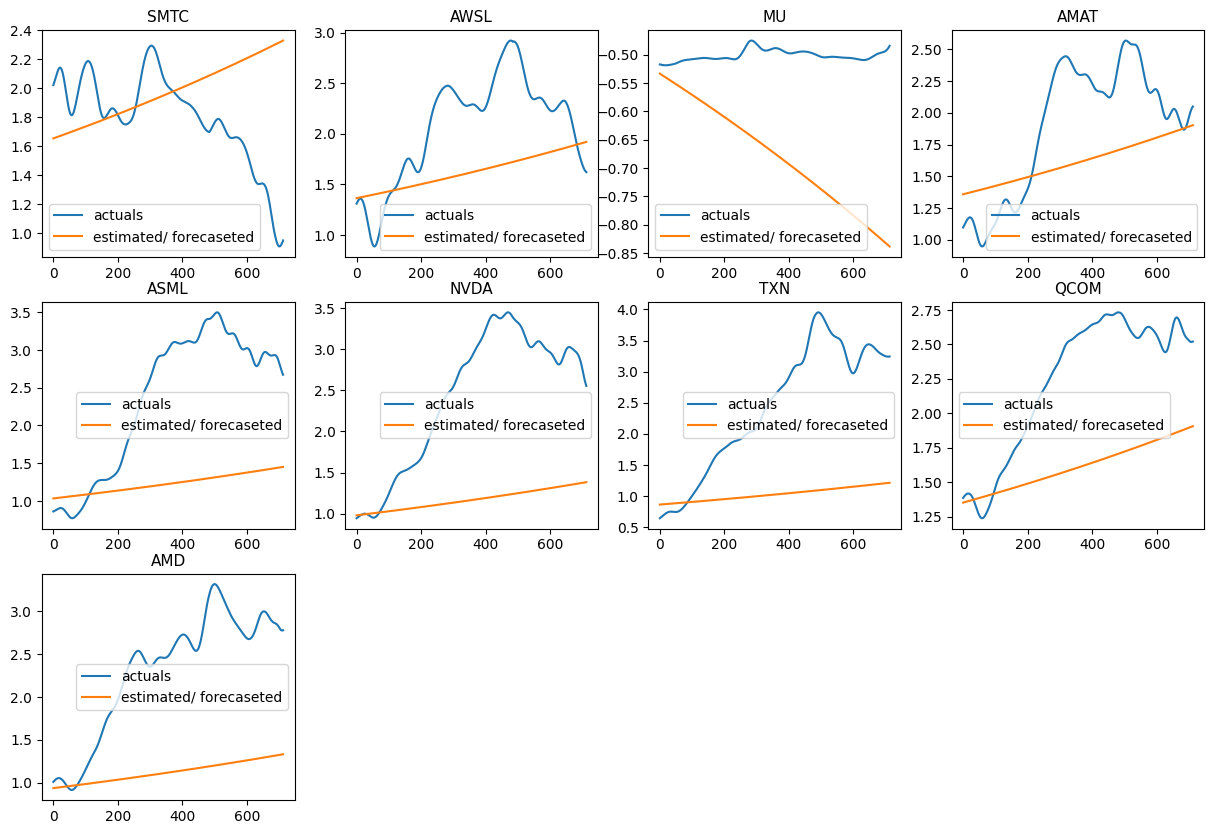

In [179]:
### plotting the graphs using ARIMA predictions
### Comparing the Values with the test values
# y_preds = np.array(y_preds)
plt.figure(figsize=(15,10))
for i,col in enumerate(cols[1:]):
    plt.subplot(3,4, i+1)
    plt.plot(test_data.values[:,i])
    plt.plot(forescasts[i])
    
    plt.legend(["actuals", "estimated/ forecaseted"])
    plt.title(col, size = 11)

In [180]:
### Getting the metrics
### Metrics for this model
rmse = np.sqrt(mean_squared_error(forescasts.T, test_data.values, multioutput='raw_values'))

print("\n RMSE for each individual features ")
print(rmse)

overall_rmse = np.sqrt(mean_squared_error(forescasts.T, test_data.values))
print('\n\nOverall RMSE:', overall_rmse)


 RMSE for each individual features 
[0.50541832 0.62627919 0.19848662 0.49593887 1.39411474 1.4556063
 1.66879383 0.71989303 1.3349699  1.74977944]


Overall RMSE: 1.1464014458066842
